### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
import altair as alt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/television-brands-ecommerce-dataset/TV_Final.csv


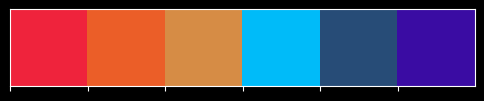

In [2]:
#color palette for this notebook
colors = ["#EF233C","#eb5e28","#d68c45","#00bbf9","#274c77","#3a0ca3"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

In [3]:
df = pd.read_csv('/kaggle/input/television-brands-ecommerce-dataset/TV_Final.csv')

In [4]:
df.shape

(912, 7)

In [5]:
df.columns

Index(['Brand', 'Resolution', 'Size ', 'Selling Price', 'Original Price',
       'Operating System', 'Rating'],
      dtype='object')

In [6]:
df.head()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
1,TCL,QLED Ultra HD,55,52999,129990,Android,4.4
2,realme,HD LED,32,13999,17999,Android,4.3
3,Mi,HD LED,32,14999,19999,Android,4.4
4,realme,HD LED,32,12999,21999,Android,4.3


In [7]:
df.sample(5)

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
254,LG,Ultra HD LED,70,94990,169990,WebOS,NaN
216,LG,Full HD LED,43,36499,41990,WebOS,4.4
721,Onix,Ultra HD LED,55,67990,67990,Android,NaN
10,Mi,Ultra HD LED,43,27999,34999,Android,4.3
576,LG,HD LED,24,14771,15900,Linux,4.4


In [8]:
df.tail()

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
907,SONY,Full HD LED,43,44999,57900,Linux,4.4
908,SONY,Full HD LED,40,41499,51900,Linux,4.6
909,SONY,Ultra HD LED,65,149990,184990,Linux,4.3
910,SONY,HD LED,32,32900,32900,Linux,4.4
911,SONY,Full HD LED,43,56900,56900,Linux,4.6


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             912 non-null    object 
 1   Resolution        912 non-null    object 
 2   Size              912 non-null    int64  
 3   Selling Price     912 non-null    int64  
 4   Original Price    912 non-null    int64  
 5   Operating System  901 non-null    object 
 6   Rating            692 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 50.0+ KB


In [10]:
df.isna().sum()

Brand                 0
Resolution            0
Size                  0
Selling Price         0
Original Price        0
Operating System     11
Rating              220
dtype: int64

### Treating duplicates

In [11]:
df.duplicated().sum()

30

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

##### We have removed all duplicate values

### Treating null values

In [14]:
mode_os = df['Operating System'].mode()[0]
df['Operating System'].fillna(mode_os, inplace=True)

In [15]:
mean_rating = df['Rating'].mean()
df['Rating'].fillna(mean_rating, inplace=True)

In [16]:
df.isna().sum()

Brand               0
Resolution          0
Size                0
Selling Price       0
Original Price      0
Operating System    0
Rating              0
dtype: int64

##### All the duplicates and null values are treated now

### Exploring Columns

In [17]:
df['Brand']=df['Brand'].replace(['Samsung'],'SAMSUNG')

In [18]:
df.Brand.nunique()

58

In [19]:
df.Resolution.value_counts() 

Ultra HD LED     390
HD LED           219
Full HD LED      210
QLED Ultra HD     60
HD Plasma          3
Name: Resolution, dtype: int64

There seems to a higher demand for Digital TVs, especially LED TVs as top three categories are all different types of LED TVs.

In [20]:
df['Operating System'].value_counts()

Android      467
Tizen        145
Linux        122
WebOS        103
HomeOS        27
VIDAA         13
FireTV OS      5
Name: Operating System, dtype: int64

### Analysis

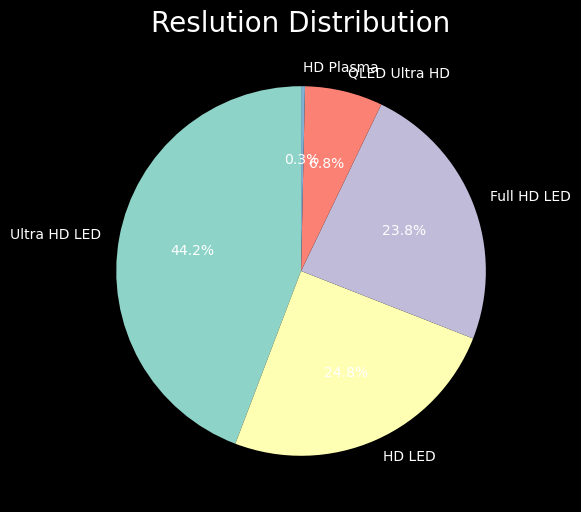

In [21]:
resolution_counts = df['Resolution'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(resolution_counts, labels=resolution_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Reslution Distribution", fontsize=20)
plt.show()

Ultra HD LED TV seems to be in greater demand as more than 40% of the products categorized as 'Television' on the website are of this type.

In [22]:
df.Brand.value_counts().head()

SAMSUNG      146
LG           116
SONY          61
TCL           41
Panasonic     28
Name: Brand, dtype: int64

Brand 'Samsung' clearly offers the maximum number of Televisions in the market closely followed by LG. While brands like Sony, TCL and Panasonic offer quite lesser number of products when compared to these two brands.

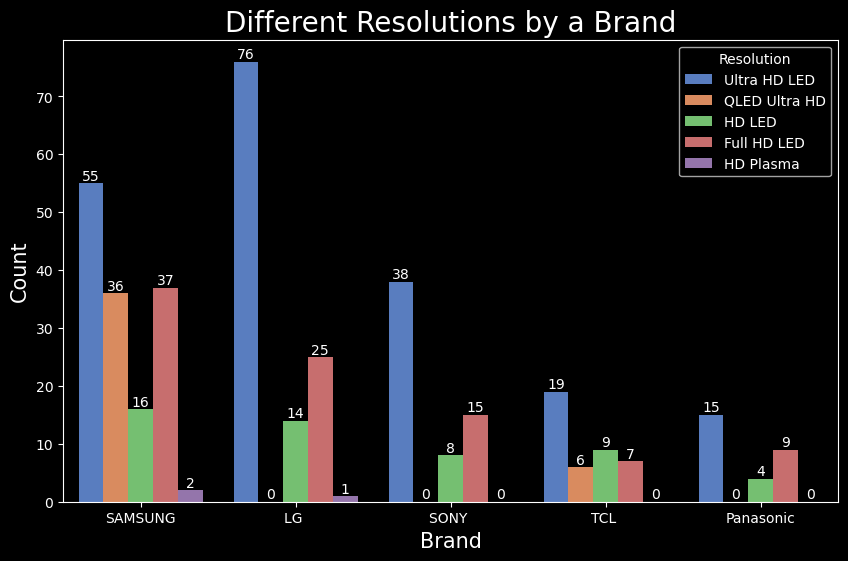

In [23]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Brand', data=df, hue='Resolution', palette='muted', order=df["Brand"].value_counts().iloc[:5].index)
plt.xlabel("Brand", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Different Resolutions by a Brand", fontsize=20)

for bars in ax.containers:
    ax.bar_label(bars)

While Samsung offers products in all Resolution categories, LG does not offer a type 'QLED Ultra HD'.

In [24]:
#Are TVs with higher ratings more expensive or do expensive TVs from well-known brands have higher ratings indicating premium quality?
round(df.groupby('Brand')['Rating'].mean().sort_values(ascending=False),1).head()

Brand
SONY        4.5
OnePlus     4.4
Vu          4.4
MOTOROLA    4.3
Haier       4.3
Name: Rating, dtype: float64

In [25]:
list1 = ["SONY","OnePlus","Haier","Vu","TOSHIBA","MOTOROLA","Mi","Compaq","Onida","Thomson",
        "KODAK","LG","realme","SAMSUNG","Nokia","Panasonic","Sansui","Micromax","PHILIPS","Samsung","JVC"]

list2 = ["Hisense","Thomson","Onix","KODAK","Dektron","iFFALCON by TCL","MarQ by Flipkart","Nokia","Coocaa","Blaupunkt","Weston","TCL",
        "Infinix","Sanyo","Intex","IMPEX","Croma","HUIDI","CloudWalker","Lloyd", 
        "Candes","Detel","LumX"]
series1 = df["Brand"].isin(list1)
series2 = df["Brand"].isin(list2)
df_f1= df[series1]
df_f2= df[series2]

/tmp/ipykernel_81/686414411.py:2: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax1 = sns.stripplot(x="Rating", y="Selling Price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
/tmp/ipykernel_81/686414411.py:3: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax2 = sns.stripplot(x="Rating", y="Selling Price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])


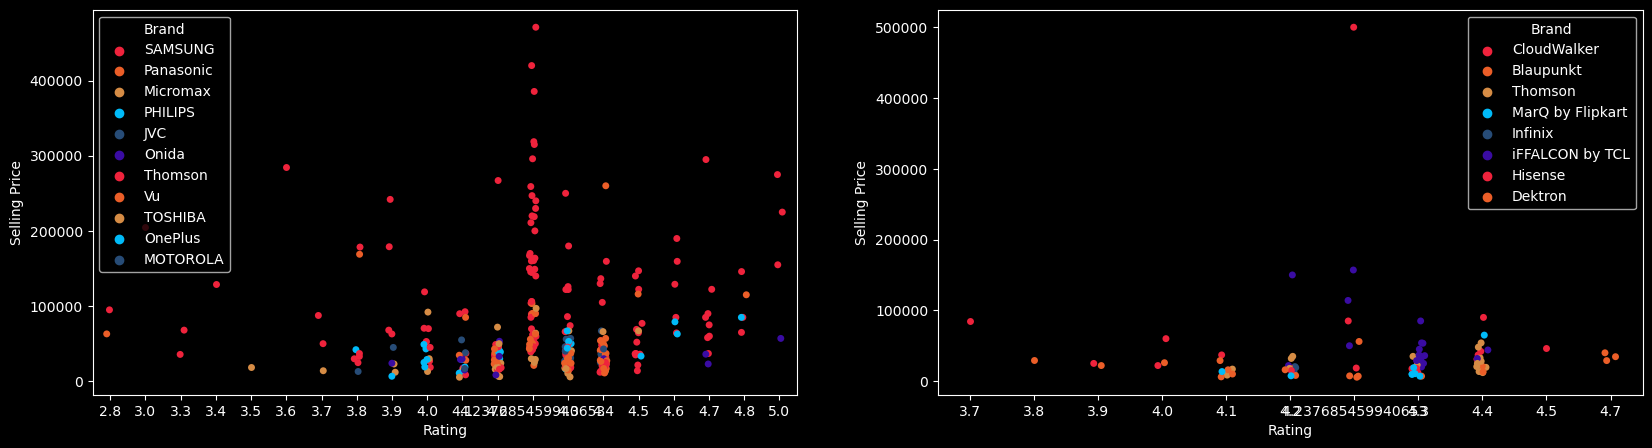

In [26]:
fig, axs = plt.subplots(ncols=2,figsize=(20,5))
ax1 = sns.stripplot(x="Rating", y="Selling Price", data=df_f1,hue="Brand", palette=colors,ax=axs[0])
ax2 = sns.stripplot(x="Rating", y="Selling Price", data=df_f2,hue="Brand", palette=colors,ax=axs[1])

The first plot on the left side shows well-known Brands with expensive TVs and their ratings while the second one on the right shows new and lesser-known brands with their selling prices and ratings. From the second plot, even the lesser known brands have a higher rating >4.0. So, it is possible that ratings are not highly influnced by brand name alone.

In [27]:
alt.Chart(df).mark_point(filled=True,size=40).encode(
    x='Original Price',
    y='Selling Price',
    color='Brand',
    tooltip=['Brand', 'Selling Price', 'Original Price']
).interactive()

alt.Chart(...)

### Average selling price by Resolution

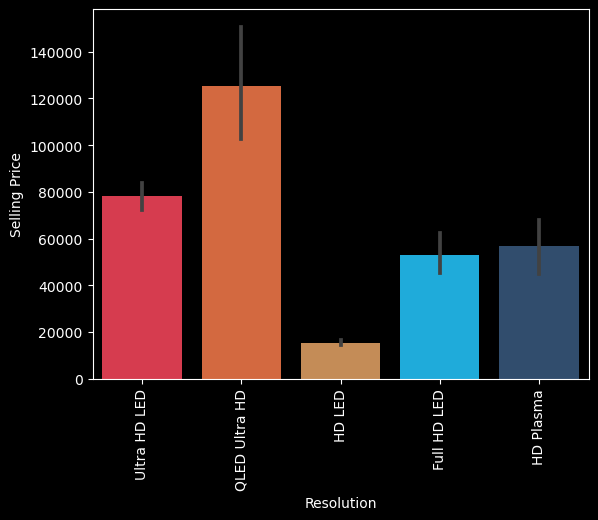

In [28]:
ax=sns.barplot(x=df['Resolution'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

### Average selling price by Brand

In [29]:
df.groupby('Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil).head()

Brand
Sharp      149672.0
SAMSUNG    107035.0
LG          96404.0
SONY        90072.0
Hisense     89796.0
Name: Selling Price, dtype: float64

In [30]:
#filter dataframe
df_p1=df_f1[(df_f1["Selling Price"] >=10000) & (df_f1["Selling Price"] <= 100000)]
df_p1.iloc[:2]

,Brand,Resolution,Size,Selling Price,Original Price,Operating System,Rating
0,TOSHIBA,Ultra HD LED,55,37999,54990,VIDAA,4.3
5,OnePlus,HD LED,32,15999,19999,Android,4.3


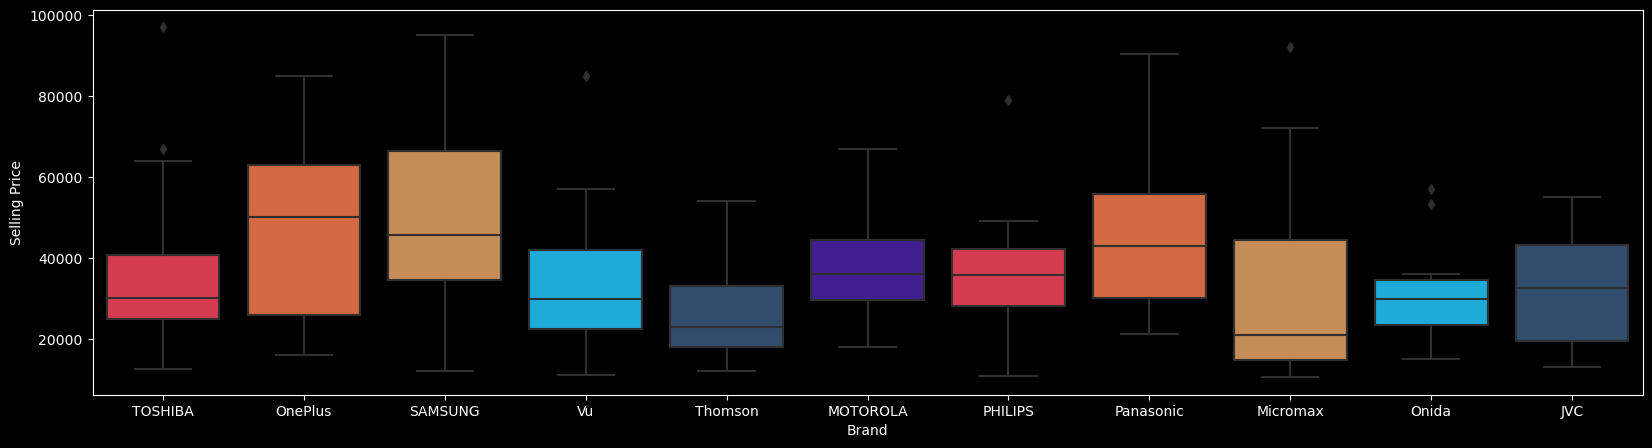

In [31]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.boxplot(x="Brand", y="Selling Price", data=df_p1,palette=colors)

It is clear that from the well-known brands SAMSUNG Televisions are the most expensive while Micromax Televisions are the most affordable ones.

### Average selling price by Operating System

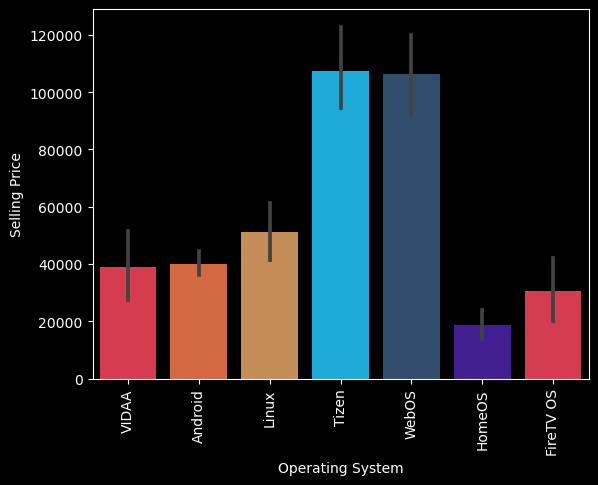

In [32]:
sns.barplot(x=df['Operating System'], y=df['Selling Price'],palette=colors)
plt.xticks(rotation="vertical")
plt.show()

From the above chart, it is clear the Television sets with Tizen and WebOS are most expensive while HomeOS Television sets are the most affordable ones.

## Conclusion:

* There is a clear demand for different types of televisions looking at the number of products offered by 58 unique brands in the market
* Brands like SAMSUNG, LG, TOSHIBA seems to be quite popular but there are a number of upcoming brands with competitive products in the market.
* SAMSUNG has the highest number of products i.e. televisions
* There is no clear correlation between selling price and higher ratings for televisions
* Average Selling Price by Brand - Sharp, SAMSUNG and LG are the most expensive brands.